In [1]:
import numpy as np
import pandas as pd

In [2]:
from pathlib import Path
import os
import matplotlib.pyplot as plt
from matplotlib import colors


In [3]:
cwd = Path(os.getcwd())

In [4]:
def get_data(filename):
    sphraw = pd.read_csv( filename, delim_whitespace=True, header=None)
    centers = sphraw.iloc[1:,:3].values
    centers, unique_i = np.unique(centers,axis=0, return_index=True)    # check for unique spheres (sometimes multiple spheres have same location and radius)
    rads = sphraw.iloc[1:,3].values[unique_i]
    return rads

In [5]:
def dataf(dirname, box, nb_max, e):
    fileList = [file for file in os.listdir(cwd / dirname) if file.endswith(".txt")]
    
    d = {}
    for file in fileList:
        r = get_data(cwd / dirname / file)
        a,b = [float(s)/100 for s in file.split('_') if s.isdigit()]
        rep = int(dirname.split('REP')[-1])
        d_mean = int(dirlist[1].split('_REP')[0].split('R')[-1]) * 2 
        rep_n = np.round(rep / d_mean , 2) * 100
        d[file.split('.txt')[0].split('_agg')[0]] = {'alpha': a, 'beta': b, 'rep': rep, 'rep_n': rep_n,
                                                     'nb': len(r), 'vv': np.round(1 - sum(r**3 *4/3*np.pi)/box**3,3) }
    
    data = pd.DataFrame.from_dict(d,orient='index')
    data = data.sort_values(by=['alpha','beta'])
    data['nb_e'] = np.round(data.nb/nb_max,2)*100 
    
    df_ok = data.loc[(data['nb_e'] >= 100-e) & (data['nb_e'] <= 100+e)] # dataframe.loc[dataframe['Percentage'] > 80]
    
    return data, df_ok

In [17]:
reps = sorted([int(item.split('REP')[1]) for item in os.listdir() if 'Al2O3PPI40_R14_REP' in item])

print(reps)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [19]:
dirlist = ['Al2O3PPI40_R14_REP'+ str(i) for i in reps] #[4, 6, 8, 10, 12, 15]]

dd = {}

for c in dirlist:
    #nrep = np.round(int(c.split('REP')[-1])/ int(c.split('_REP')[0].split('R')[-1])*100,2)

    dd[int(c.split('REP')[-1])],_ = dataf(c,420,2025, 2) 

In [20]:
ddf = pd.concat(dd.values(), ignore_index=True)

In [30]:
err = 1

In [31]:
ddf['isin'] = np.where( (ddf['nb_e'] >= 100-err) & (ddf['nb_e'] <= 100+err), True, False)
 

In [32]:
pin = ddf.loc[ddf['isin'] == True]

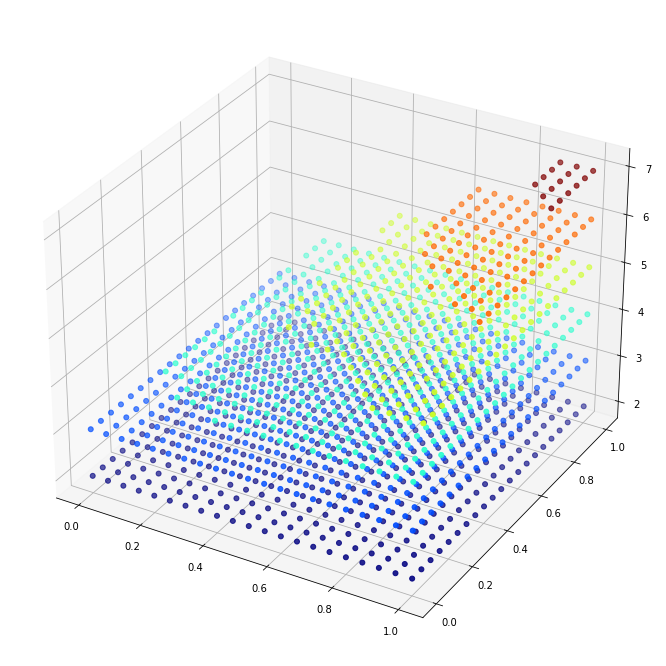

In [33]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')
cmap = plt.cm.jet

norm1 = colors.BoundaryNorm( np.append(np.unique(pin.rep), np.unique(pin.rep)[-1]), cmap.N) # np.arange(ddf.rep.min(), ddf.rep.max()+1, 3)
ax.scatter(pin.alpha, pin.beta, pin.rep, c=pin.rep, cmap=cmap, norm=norm1, marker='o',s = 25)

In [34]:
 np.append(np.unique(pin.rep), np.unique(pin.rep)[-1])

array([2, 3, 4, 5, 6, 7, 7], dtype=int64)

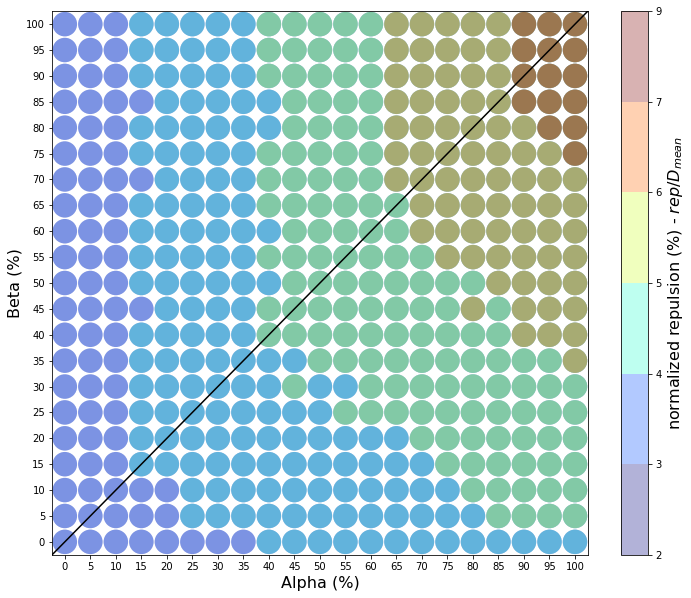

In [36]:
f1,a1 = plt.subplots(figsize=(12,10))
cmap = plt.cm.jet
norm1 = colors.BoundaryNorm( np.append(np.unique(pin.rep), np.unique(pin.rep)[-1]+2), cmap.N) # np.arange(ddf.rep.min(), ddf.rep.max()+1, 3)
sp1 =a1.scatter(pin.alpha*100, pin.beta*100, marker='o', c=pin.rep, cmap=cmap, norm=norm1, alpha=0.30, edgecolor='none', s=600)
# x100 = a.scatter( ok.alpha*100,pin ok.beta*100, marker='x', c='k' )
cbar1 = f1.colorbar(sp1, ticks=np.append(np.unique(pin.rep), np.unique(pin.rep)[-1]+2))
cbar1.set_label(r'normalized repulsion (%) - $rep/D_{mean}$', fontsize=16)
a1.set_ylabel('Beta (%)', fontsize=16)
a1.set_xlabel('Alpha (%)', fontsize=16)
a1.set_xticks(np.linspace(0,1,21)*100)
a1.set_yticks(np.linspace(0,1,21)*100);

# a.grid()
lp = a1.plot(np.linspace(-5,105), np.linspace(-5,105), c='k')
a1.set_xlim(-2.5,102.5)
a1.set_ylim(-2.5,102.5);

In [109]:
pin.loc[pin['rep_n'] == 26]

,alpha,beta,rep,rep_n,nb,vv,nb_e,isin
1966,0.45,0.65,9,26.0,1406,0.735,98.0,True
1971,0.45,0.90,9,26.0,1403,0.736,98.0,True
1972,0.45,0.95,9,26.0,1401,0.736,98.0,True
1973,0.45,1.00,9,26.0,1408,0.735,98.0,True
1983,0.50,0.45,9,26.0,1410,0.734,98.0,True
...,...,...,...,...,...,...,...,...
2186,1.00,0.10,9,26.0,1416,0.733,99.0,True
2187,1.00,0.15,9,26.0,1418,0.733,99.0,True
2188,1.00,0.20,9,26.0,1442,0.728,100.0,True
2189,1.00,0.25,9,26.0,1448,0.727,101.0,True


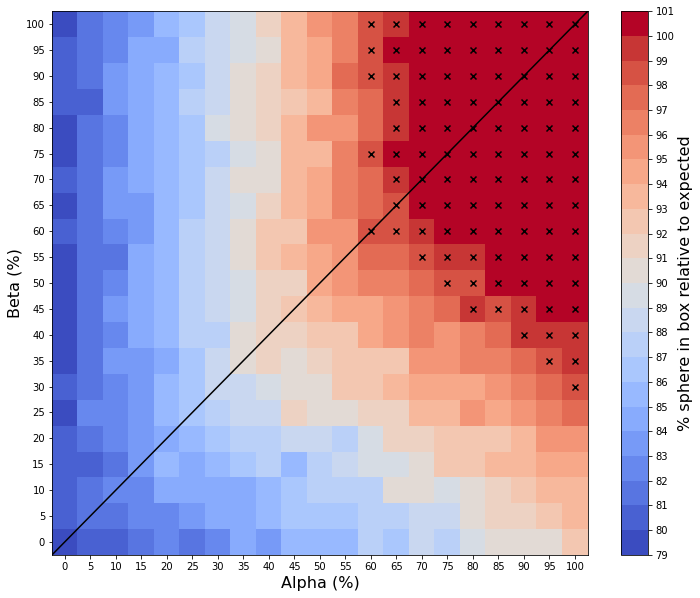

In [52]:
df, ok = dataf('Al2O3PPI40_R14_REP6', 420, 2025, 2)

f,a = plt.subplots(figsize=(12,10))
cmap = plt.cm.coolwarm
norm = colors.BoundaryNorm(np.arange(int(df.nb_e.min()), int(df.nb_e.max())+1, 1), cmap.N)
sp =a.scatter(df.alpha*100, df.beta*100, marker='s', c=df.nb_e, cmap=cmap, norm=norm, s=700, edgecolor='none')
x100 = a.scatter( ok.alpha*100, ok.beta*100, marker='x', c='k' )
cbar = f.colorbar(sp, ticks=np.arange(int(df.nb_e.min()),int(df.nb_e.max())+2,1))
cbar.set_label('% sphere in box relative to expected', fontsize=16)
a.set_ylabel('Beta (%)', fontsize=16)
a.set_xlabel('Alpha (%)', fontsize=16)
a.set_xticks(np.linspace(0,1,21)*100)
a.set_yticks(np.linspace(0,1,21)*100);
# a.grid()
lp = a.plot(np.linspace(-5,105), np.linspace(-5,105), c='k')
a.set_xlim(-2.5,102.5)
a.set_ylim(-2.5,102.5);